# AGRICULTURAL PRODUCTION OPTIMISATION ENGINE
##### **Outcome**
Build a predictive model aimed at precision farming to suggest the most appropriate crops to grow based on the climatic and soil conditions.

##### **Goals**
1. We have to optimise productivity
2. By understanding requirements of climatc and soil conditions for crops
3. Helps us to cope wth weather unpredictability


In [1]:
#For data manipulation
import numpy as np
import pandas as pd

#For data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#For interactivity
from ipywidgets import interact

In [2]:
# To read the dataset by storing in a variable, we can access it by calling this variable
data = pd.read_csv('C:/Users/aimee/OneDrive/Desktop/data.csv')

In [3]:
# Check the shape of the dataset to check the number of rows and collumns present in the dataset
print ("Shape of the Dataset: ",data.shape)

Shape of the Dataset:  (2200, 8)


In [4]:
# To check the head of the dataset 
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
# We must detect null values as ML models are not able to process missing values. To check null values, isnull fun is used
data.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# To explore the crops present in the dataset, the value_counts function returns the count of unique values present in a collumn
data['label'].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
# Value_counts will return values in desc order and excludes all N/A values by default

In [8]:
#summary for all the crops
print("Average ratio of Nitrogen in the soil : {0:.2f}".format(data['N'].mean()))
print("Average ratio of Phosphorous in the soil : {0:.2f}".format(data['P'].mean()))
print("Average ratio of Potassum in the soil : {0:.2f}".format(data['K'].mean()))
print("Average temperature Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average relative humidity in % : {0:.2f}".format(data['N'].mean()))
print("Average PH value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average rainfall in mm : {0:.2f}".format(data['rainfall'].mean())) 

Average ratio of Nitrogen in the soil : 50.55
Average ratio of Phosphorous in the soil : 53.36
Average ratio of Potassum in the soil : 48.15
Average temperature Celsius : 25.62
Average relative humidity in % : 50.55
Average PH value of the soil : 6.47
Average rainfall in mm : 103.46


In [9]:
# Create a func to add interactivity to ouput results for each crop wth correct formatting
# lets check the Summary statistics for each of the Crops
@interact
def summary(crops = list (data['label'].value_counts().index)): 
    x = data[data[ 'label'] == crops]
    print("-------------------------------------------")
    print("Statistics for Nitrogen") 
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max ()) 
    print("-------------------------------------------")
    print("statistics for Phosphorous") 
    print("Minimum Phosphorous required:", x['N'].min())
    print("Average Phosphorous required:", x[ 'N' ].mean())
    print("Maximum Phosphorous required:", x[ 'N' ].max())
    print("-------------------------------------------")
    print("statistics for Potassium") 
    print("Minimum Potassium required:", x['N'].min())
    print("Average Potassium required:", x['N'].mean())
    print("Maximum Potassium required:", x['N'].max())
    print("-------------------------------------------")
    print("statistics for Temperature") 
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x[ 'temperature'] .mean()))
    print("Maximum Temperature required : {0:.2f})".format (x[ 'temperature' ].max()))
    print("-------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("-------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required  : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean ()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max ()))
    print("-------------------------------------------")
    print("statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max ()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [10]:
# Let's compare the Average Requirement for each crops with average conditions
@interact
def compare (conditions = ['N', 'P', 'K','temperature', 'ph', 'humidity', 'rainfall' ]):
    print ("Average Value for", conditions, "is {0:.2f}".format (data[conditions].mean()))
    print("-------------------------------------------")
    print("Rice: {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams: {0:.2f}".format(data[data['label'] =='blackgram'][conditions].mean()))
    print("Banana: {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute :  {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f} ".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] =='papaya')][conditions].mean()))
    print("Muskmelon: {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print ("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print ("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils :  {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton:  {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print ("Maize :  {0:.2f}".format(data[(data['label'] =='maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas :  {0:.2f}".format(data[(data['label'] =='pigeonpeas')][conditions].mean()))
    print("Mango :  {0:.2f}".format(data[data['label']== 'mango'][conditions].mean()))
    print ("Pomegranate :  {0:.2f}".format(data[(data['label'] =='pomegranate')][conditions].mean()))
    print("Coffee :  {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))                               

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [11]:
# lets make this funtion more Intuitive
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops that require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("--------------------------------------")
    print("Crops that require less than average" , conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# Distribution
- Foundation of all statistics and probabilty, helps us visualise the anomolies or outliers present in the data. Also gives us an idea of the overall pattern in the data.

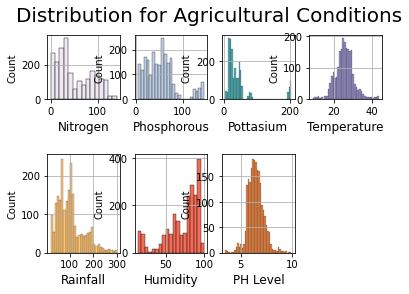

In [12]:
# Let's check the distribution of Agricultural Conditions
plt.subplot(3,4,1)
sns.histplot(data['N'], color="#ece2f0")
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color="#a6bddb")
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color="#1c9099")
plt.xlabel('Pottasium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'], color="#756bb1")
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['rainfall'], color="#feb24c")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['humidity'], color="#f03b20")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['ph'], color="#d95f0e")
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [13]:
# Let's find out some Interesting Facts
print ("Interesting Patterns in the data")
print("------------------------------------" )
print("Crops which require a very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print ("Crops which require a very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which require a very High Ratio. of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique()) 
print("Crops which require very High Rainfall:", data[data[ 'rainfall'] > 200]['label'].unique()) 
print("Crops which require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops which require very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which require very Low Humidity:", data[data['humidity'] < 20][ 'label'].unique()) 
print("Crops which require very Low pH levels:", data[data['ph'] < 4]['label'].unique())
print ("Crops which require very High pH levels:", data[data['ph'] > 9]['label'].unique())

Interesting Patterns in the data
------------------------------------
Crops which require a very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which require a very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which require a very High Ratio. of Potassium Content in Soil: ['grapes' 'apple']
Crops which require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which require very Low Temperature: ['grapes']
Crops which require very High Temperature : ['grapes' 'papaya']
Crops which require very Low Humidity: ['chickpea' 'kidneybeans']
Crops which require very Low pH levels: ['mothbeans']
Crops which require very High pH levels: ['mothbeans']


In [14]:
# Let's understand which crops can only be Grown in Summer Season, Winter season and Rainy Season
print ("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("---------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


- We need to find similar crops using (unsupervised learning) clustering analysis (classfy data points into relative groups/clusters). We will not be using labels to train the data instead we will be finding similar data points by following existing patterns within the data using k-means clustering method.

In [15]:
# let's import the warnings Library so that we can avoid warnings
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

# Let's select the label column from the Data
x = data.loc[:, ['N', 'P', 'K', "temperature", 'ph', 'humidity', 'rainfall']].values

# let's check the shape of x
print(x.shape)
             
# let's convert this data into a dataframe
x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


- We need to determine the right number of clusters required for seperating these datapoints
- To do that we use the elbow method to determine the number of clusters in the dataset (consists of plotting the number of clusters and picking the elbow from the curve as the number of clusters to use)

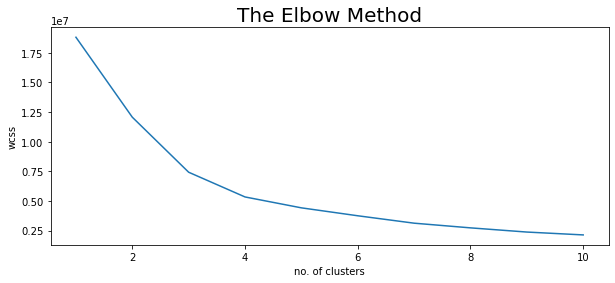

In [16]:
# Let's determine the Optimum Number of Clusters within the Dataset

plt.rcParams['figure.figsize'] = (10, 4)
wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# let's plot the results
plt.plot(range (1, 11), wcss) 
plt.title('The Elbow Method', fontsize = 20) 
plt. xlabel ('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [17]:
#Let's impliment the k-means algorithm to perform clustering analysis
#Define the algorithm as below
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = kmeans.fit_predict(x)

#Next we will create our data using the above algorithm and store it in a Variable 
# Find out the Results
a = data['label']
y_means = pd.DataFrame(y_means) # store in this variable
z = pd.concat([y_means, a], axis = 1)
Z = z.rename(columns = {0:'cluster'})

#  Check the clusters of each Crops
print("Let's Check the Results After Applying the K-Means Clustering Analysis \n")
print("Crops in First Cluster:", z[Z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[Z['cluster'] == 1][ 'label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third cluster:", z[Z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Fourth Cluster:", z[Z['cluster'] == 3]['label'].unique())
print("---------------------------------------------------------------")


Let's Check the Results After Applying the K-Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Third cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------



- Crops clustered together are similar to each other which will help the farmer to choose the alternate crops easer while maximising productivity

# Predictictive model
- Next, we build a predictive model to suggest the best crops according to soil and climatic conditions for a specific region

- Predictive models are examples of AI applications. we train a ML model using training dataset, after the model is trained we can use the same model to give us predictons about the same model.

- The model will try and learn the trends and patterns from the data so it can do the predictions later.

- We can make predictions using the model we trained, by using the pred function.

- So we are going to train the model, then test the model. We use evaluation metric's to evaluate the model's performance they analyse the predictive models and generate trust in the model. 

- The evaluation metrics help us to generate an accuracy score for the predictive model which helps us understand how accurate the predictions are.

- We will use logistic regression model, a probalistic model that works well in cases of likelihood and classes. Used when classes or labels are more than 2. 

In [18]:
# Let's split the dataset for predictive modelling
# We will store the labels in variable Y and the rest of the var in X. 
y = data['label']
x = data.drop(['label'], axis = 1)

print("shape of x:", x.shape)
print("shape of y:", y.shape)

# In order to predict y. X and Y sets have to be seperated when training the model 

shape of x: (2200, 7)
shape of y: (2200,)


In [19]:
# let's create Training and Testing Sets for validation of Results 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print ("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


- We make predictions for the testng set we created and saved into a variable called y_pred. 
- The answers for the x test set are in the y test set. We can compare y_test with y_pred by using the model we are going to import the classification report from the sklearn lbrary to help us understand the accuracy of ths model


In [20]:
#Let's create a predictive model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)


- The higher the recall and precision hints towards a very good predictive model and greater performance

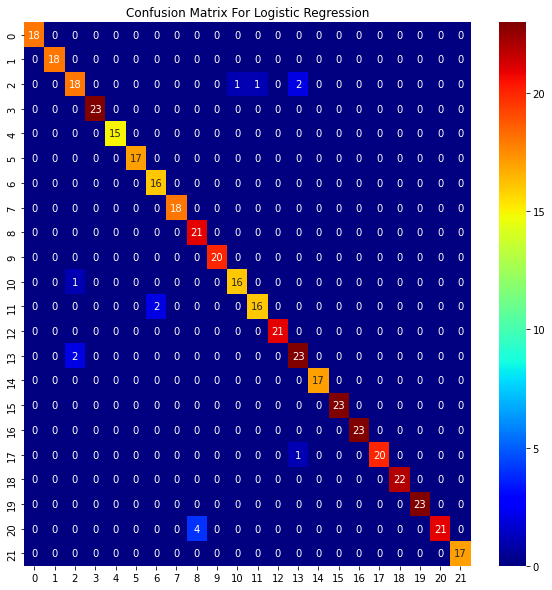

In [21]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams ['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'jet')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

In [22]:
# Defining the classification Report
from sklearn.metrics import classification_report

# Print the classification report to measure the quality of predictions
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [23]:
# Check the model prediction in real time for rice
data[data['label'] == 'rice'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
prediction = model.predict((np.array([[90,
                                      40,
                                      35,
                                      20,
                                      80,
                                       7,
                                      205]])))
print("The Suggested Crop for the Given Climatic condition is:", prediction)

The Suggested Crop for the Given Climatic condition is: ['rice']


In [25]:
prediction = model.predict((np.array([[50,
                                      10,
                                      20,
                                      45,
                                      60,
                                       6,
                                      100]])))
print("The Suggested Crop for the Given Climatic condition is:", prediction)

The Suggested Crop for the Given Climatic condition is: ['mango']
